In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
% matplotlib inline

Montrons quelques exemples qui illustrent que pour un AR(1), il faut et il suffit pour avoir la condition (S) que $|\phi| < 1$ avec :

$X_t = \phi X_{t-1} + \sigma \epsilon(t)$

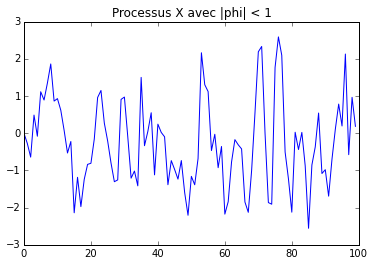

In [3]:
T = 100
X = np.zeros((T,1))
phi = 0.5

B = np.random.randn(T,1)

for t in (np.arange(T-1) + 1):
    X[t] = phi * X[t-1] + B[t]
    
plt.figure()
plt.plot(X)
plt.title("Processus X avec |phi| < 1")

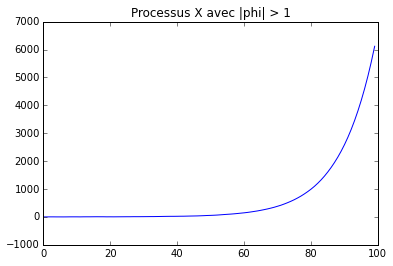

In [4]:
T = 100
X = np.zeros((T,1))
phi = 1.1

B = np.random.randn(T,1)

for t in (np.arange(T-1) + 1):
    X[t] = phi * X[t-1] + B[t]
    
plt.figure()
plt.plot(X)
plt.title("Processus X avec |phi| > 1")

On montre par l'exemple l'importance pour un AR(1) de la norme de $\phi$. 

On se donne la condition (1) telle que si celle si est vérifiée :

$sup_t(\mathbb{E}(|X_t|^2) < +\infty$ (S)

On se donne le TVAR(2) définit tel que :

$X_{2t} = a_1^P(2t)X_{2t-1} + \sigma(2t)\epsilon(2t)$ (2)

et

$X_{2t+1} = a_2^I(2t+1)X_{2t-1} + \sigma(2t+1)\epsilon(2t+1)$

Montrons que $X_{2t}$ est un TVAR(1) qui respecte (1) mais pas (S)

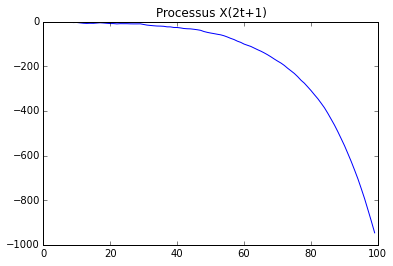

In [10]:
N = 1 #Nombre d'échantillons observés
T = 200 #horizon des temps
X = np.zeros((T,1)) #SX avec X_0 = X_1 = 0
a_P = 0.5 #coeff a_1^P
a_I_1 = 1./np.sqrt(2) #coeff a_1^I
a_I_2 = 1./np.sqrt(2) #coeff a_2^I
B = np.random.randn(T,1) #Bruit pour chaque échantillon

for t in (np.arange(T-2)+2): # On balaye de 2 à T
    if t%2 ==0:
        X[t] = a_P * X[t-1] + B[t]
    
    else:
        X[t] = a_I_1 * X[t-1] + a_I_2 * X[t-2] + B[t]

X_2 = np.array([X[2*i+1] for i in np.arange(T/2)])
plt.plot(X_2)
plt.title("Processus X(2t+1)")

sup_X = np.max([np.abs(X_2[i] ** 2) for i in np.arange(len(X_2))])


Le processus $Y_t = X_{2t+1}$ diverge malgré le fait que ce processus convienne à la condition que les racines de $A(z;t)$ soient dans le cercle unité.